### Simple Linear Regression

In this regression task (Task2) we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. 
This is a simple linear regression task as it involves just two variables i.e. there is a single predictor

In [2]:
import pandas as pd
import numpy as np

In [11]:
data = pd.read_excel("C:\\Users\\Dhanya Singh\\Desktop\\GRIP\\Task2.xlsx")

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

We can use pairplot from matplotlib library to see the relationship between scores and number of hours. It shows that there is a positive linear relationship between hours studies and percentage scores

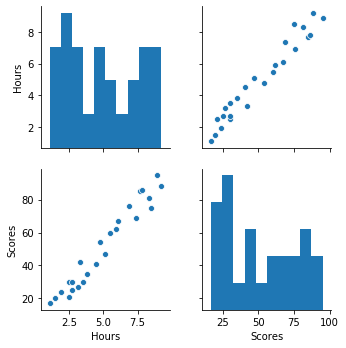

In [17]:
sns.pairplot(data)

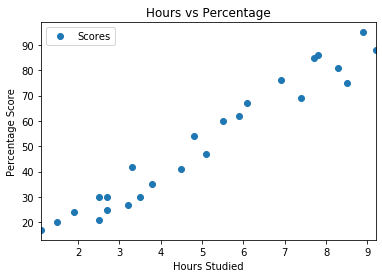

In [19]:
# Plotting the distribution of scores
data.plot(x ='Hours', y ='Scores', style ='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

#### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs) wherein we have classified x and y 

In [44]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

#### Training the Algorithm

We have split our data into training and testing sets and will train the algorithm

In [45]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            train_size = 0.7, random_state = 0) 

In [46]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


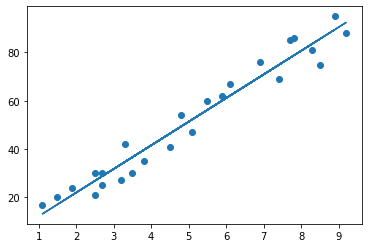

In [47]:
# Plotting the regression line
line = regressor.coef_* X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

#### Making Predictions
Now that we have trained our algorithm we will make predictions and try to answer the questions at hand.

In [48]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


In [51]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [66]:
# You can also test with your own data
own_pred = regressor.predict([[9.25]])
print('Predicted Percentage Score, if a student studies for 9.25 hours is: ', own_pred)

Predicted Percentage Score, if a student studies for 9.25 hours is:  [92.91505723]


#### Evaluating the model
The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. There are many metrics like Mean_Squared_Error, Root_Mean_Squared_Error, Mean Absolute Error etc.

In [63]:
from sklearn import metrics  
mae = metrics.mean_absolute_error(y_test, y_pred)

In [60]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [61]:
from math import sqrt
rmse = sqrt(mse)

In [65]:
print('Mean Absolute Error:', mae)
print('Mean Squared Error :' ,mse)
print('Root Mean Squared Error :' ,rmse)
print('R Square Value :',r_squared)

Mean Absolute Error: 4.419727808027652
Mean Squared Error : 22.96509721270043
Root Mean Squared Error : 4.792191274636315
R Square Value : 0.9568211104435257


The value of R2 is 0.9568 then this suggests that 95.6% of the variation in Y(Percentage Score)can be explained with the help of given explanatory variable(Hours) in that model. 
In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.